### import libraries

In [2]:
#for sql
!pip install sqldf
import sqldf
import pandas as pd
#for viz
import seaborn as sns
import matplotlib.pyplot as plt

# ***A History of F1: The Fastest Sport in the world***

Since its inception in 1950, Formula 1, often referred to as F1, has been celebrated as the pinnacle of motor racing. Emerging from a mix of amateur racing enthusiasts with a penchant for daredevilry and automotive manufacturers eager to showcase their cars, the sport has evolved and become renowned for being at the forefront of innovation and technology. It inspires millions of race fans worldwide as teams and drivers compete against each other and the clock, striving for the ultimate honor of being crowned world champions.

As a fan of F-1 since the late 90's, I'm going to dig into the data and see what insights I can gather and get a look at how the sport I love so dearly has evolved and also paint a picture for anyone curious to see what F1 is all about.

The dataset used spans the years 1950-1975 and can be found here:
[dataset](https://https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?resource=download#)

## ***The Basics***

Let's start with the basics:

F-1 is comprised of teams who build the cars and employ drivers who race them. Although a team sport, it's usually the drivers who get all the attention. They are the most visible part of the team and in teams that are fielded by manufacturers, they also become the de-fato face of the brand. They also risk their lives since motor-racing is inherently a dangerous sport.

So, let's see what we can find out about the various teams and drivers who have a part of F1 in the past 75 years.

### ***Teams***

In [4]:
#grouping constructors and nationality
#read the csv file
constructors = pd.read_csv('/content/constructors.csv')

query = """
SELECT nationality,
       COUNT(*) AS constructor_count
FROM constructors
GROUP BY nationality
ORDER BY constructor_count DESC
"""
#convert to df to plot
result = sqldf.run(query)

#plot

#set figure size
fig,ax=plt.subplots(figsize=(10,8))
#set background color for the bar chart
sns.set_style('darkgrid')
#plot bar chart
ax.grid(False)
sns.barplot(data=result, x='nationality', y='constructor_count',ax=ax);
#rotate the labels for visibility
plt.xticks(rotation=90);

FileNotFoundError: [Errno 2] No such file or directory: '/content/constructors.csv'

F1 is predominantly based in Europe with the UK dubbed as the Silicon Valley of the sport. Even most current teams have their racing HQ's and facilities in the UK. Hence, it is not unsurprising to see that most F1 teams are European and a majority overwhelmingly English.

### ***Type of Teams***

Delving into team histories is very convoluted because of the ways teams try to survive. F1 being very complex and expensive meant most teams did not last very long as they run out of money.

To survive, small independent teams often tied-up with OEM's by way of sponsorship or exhange of technology. Such tie-ups also led to rebranding of the team to reflect the new partnership. For example: Team Mclaren was rebranded to McLaren-Honda when they sourced their engines from Honda. They are now called McLaren-Mercedes as they now run Mercedes engines. This is one way team branding evolves.

 In some cases, independent teams usually owned by a single person, often get bought by other racing entrpeuners or in some cases, automotive OEM's when the incumbent decides to move on or when they simply run of money. For example: the current Mercedes-AMG team traces it's lineage back to the 1980's when it was first owned and run by Ken Tyrrell before being bought by British AMerican TObacco, followed by Honda and then Brawn GP.

Let's look at the composition of teams across the sports history:

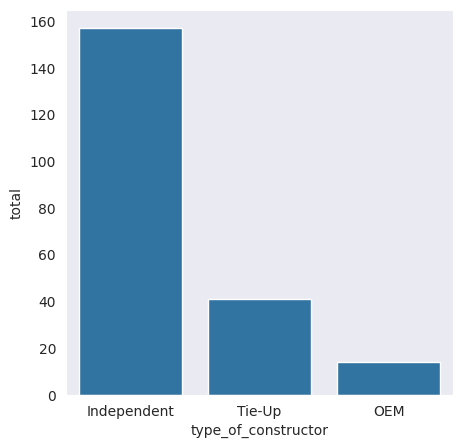

In [74]:
#team composition

query="""
SELECT type AS type_of_constructor,
       count(*) AS total
FROM constructors
GROUP BY type
ORDER BY total DESC
"""
result = sqldf.run(query)

#plot
#set figure size
fig,ax=plt.subplots(figsize=(5,5))
#set background color for the bar chart
sns.set_style('darkgrid')
ax.grid(False)
#plot bar chart
sns.barplot(data=result, x='type_of_constructor', y='total');
#rotate the labels for visibility
# plt.xticks(rotation=90);

### ***Most successful team of all time?***

In [88]:
#find out the most successful team in the sport by wins
#read the csv file
constructor_standings = pd.read_csv('/content/constructor_standings.csv')

query = """

SELECT constructors.name,
       COUNT(*) AS total_wins
FROM constructors
JOIN constructor_standings
  ON constructors.constructorId = constructor_standings.constructorId
WHERE constructor_standings.position = 1
GROUP BY constructors.name
ORDER BY total_wins DESC
LIMIT 2
"""

wins= sqldf.run(query)
wins
# #plot
# #set figure size
# fig,ax=plt.subplots(figsize=(15,8))
# #set background color for the bar chart
# ax.grid(False)
# sns.set_style('darkgrid')
# #plot bar chart
# sns.barplot(data=result, x='name', y='total_wins');
# #rotate the labels for visibility
# plt.xticks(rotation=90);

,name,total_wins
0,Ferrari,234
1,McLaren,165


In [1]:
#combining results and races
#using DISTINCT to get the right number of races

results = pd.read_csv('/content/results.csv')
races = pd.read_csv('/content/races.csv')

query = """

SELECT
        constructors.constructorId,
        constructors.name,
        COUNT(DISTINCT(races.raceId)) AS total_races,
        COUNT(CASE WHEN results.positionOrder = 1 THEN 1 END) AS total_wins,
        ROUND(COUNT(CASE WHEN results.positionOrder = 1 THEN 1 END) * 100.0 / COUNT(DISTINCT(races.raceId)),2) AS win_percentage,
        COUNT(CASE WHEN results.positionOrder = 2 THEN 1 END) AS total_second_place_finishes,
        COUNT(CASE WHEN results.positionOrder = 3 THEN 1 END) AS total_third_place_finishes
FROM constructors
JOIN results ON
     constructors.constructorId = results.constructorId
JOIN races ON
     results.raceId = races.raceId
GROUP BY constructors.constructorId, constructors.name
ORDER BY total_wins DESC
LIMIT 5 ;

"""

wins2 = sqldf.run(query)
wins2
# #plot
# #set figure size
# fig,ax=plt.subplots(figsize=(15,8))
# #set background color for the bar chart
# ax.grid(False)
# sns.set_style('darkgrid')
# #plot bar chart
# sns.barplot(data=result, x='name', y='win_percentage');
# #rotate the labels for visibility
# plt.xticks(rotation=90);

NameError: name 'pd' is not defined

In [ ]:
#use CTE to get the wins and total number of podiums
# does not work for some reason

# results = pd.read_csv('/content/results.csv')
# races = pd.read_csv('/content/races.csv')

# query = """

# with all_results AS (

# SELECT
#         constructors.constructorId,
#         constructors.name,
#         COUNT(DISTINCT(races.raceId)) AS total_races,
#         COUNT(CASE WHEN results.positionOrder = 1 THEN 1 END) AS total_wins,
#         COUNT(CASE WHEN results.positionOrder = 2 THEN 1 END) AS total_second_place_finishes,
#         COUNT(CASE WHEN results.positionOrder = 3 THEN 1 END) AS total_third_place_finishes
# FROM constructors
# JOIN results ON
#      constructors.constructorId = results.constructorId
# JOIN races ON
#      results.raceId = races.raceId
# GROUP BY constructors.constructorId, constructors.name
# ORDER BY total_wins DESC

# )

# SELECT name,
#        total_wins,
#        total_second_place_finishes + total_third_place_finishes AS total_podiums
# FROM all_results

# """

# sqldf.run(query)

In [ ]:
#since CTE is not working trying it as sub-query
# this also is not working

# query = """

# SELECT name,
#        total_wins,
#        (total_second_place_finishes + total_third_place_finishes) AS total_podiums
# FROM (
# SELECT
#         constructors.constructorId,
#         constructors.name,
#         COUNT(DISTINCT(races.raceId)) AS total_races,
#         COUNT(CASE WHEN results.positionOrder = 1 THEN 1 END) AS total_wins,
#         COUNT(CASE WHEN results.positionOrder = 2 THEN 1 END) AS total_second_place_finishes,
#         COUNT(CASE WHEN results.positionOrder = 3 THEN 1 END) AS total_third_place_finishes
# FROM constructors
# JOIN results ON
#      constructors.constructorId = results.constructorId
# JOIN races ON
#      results.raceId = races.raceId
# GROUP BY constructors.constructorId, constructors.name
# ORDER BY total_wins DESC
# )

# """

# sqldf.run(query)